In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#!pip install plotly
#!pip install cufflinks

# Tratamento 
### (PiB Per Capita da África)


In [33]:
data = pd.read_csv('raw_data/pib_percapita.csv')
data.set_index('Country', inplace=True)
all_countries = data.index

In [34]:
data.drop(data.columns[[0, 1, 2, 3, data.shape[1] -1]], axis=1, inplace = True)

In [35]:
data.dropna(inplace=True)

In [36]:
used_countries = data.index

###### Países com valores faltantes

In [37]:
retired_countries = {"Retired Countries": list(set(all_countries) - set(used_countries))}
retired_countries = pd.DataFrame(data=retired_countries)
retired_countries.to_csv("data_finish/pib_percapita/Retired_countries_pib_percapita")
retired_countries.to_excel("data_finish/pib_percapita/Retired_countries_pib_percapita.xlsx", sheet_name='Sheet')

In [38]:
data.columns = data.columns.astype(int)

In [39]:
data = data.replace('[^\d.]', '', regex=True).astype(float).copy()

In [40]:
data.to_csv("data_finish/pib_percapita/Pib_percapita")
data.to_excel("data_finish/pib_percapita/Pib_percapita.xlsx", sheet_name='Sheet')
data = data.transpose()
data.to_csv("data_finish/pib_percapita/Pib_percapita_transpose")
data.to_excel("data_finish/pib_percapita/Pib_percapita_transpose.xlsx", sheet_name='Sheet')

In [74]:
data.transpose().head(2).sum()

1980     3013.729
1981     2984.530
1982     2915.850
1983     2988.484
1984     3126.499
1985     3512.225
1986     3389.366
1987     3474.673
1988     2956.534
1989     3048.138
1990     3460.149
1991     2748.486
1992     2568.479
1993     2384.705
1994     1889.209
1995     1918.669
1996     2168.673
1997     2257.807
1998     2126.131
1999     2082.747
2000     2446.810
2001     2388.277
2002     2648.280
2003     3080.359
2004     3858.350
2005     5003.450
2006     6070.820
2007     7085.650
2008     9025.190
2009     7032.860
2010     8122.160
2011    10170.140
2012    10820.670
2013    10913.580
2014    11092.070
2015     8508.240
2016     7595.770
2017     8383.340
2018     7739.330
2019     6913.670
2020     5274.730
2021     5444.320
2022     5359.840
dtype: float64

<ipython-input-79-08c31c61ce6f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


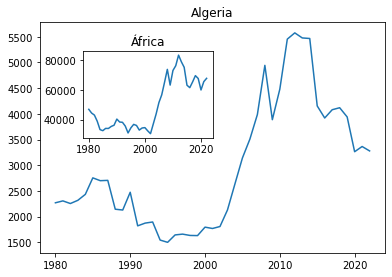

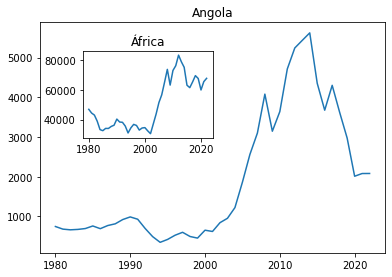

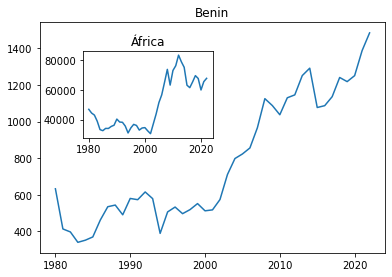

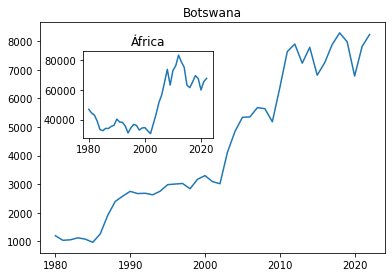

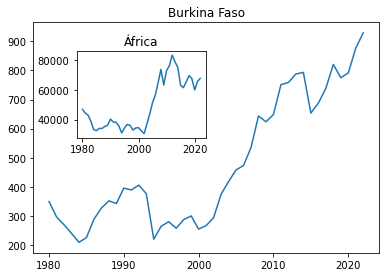

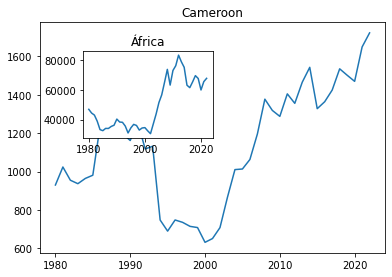

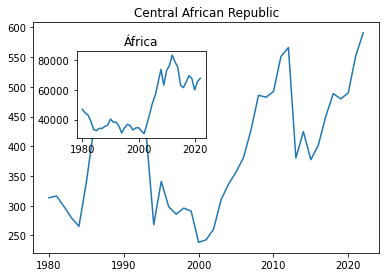

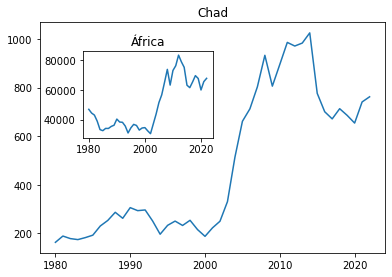

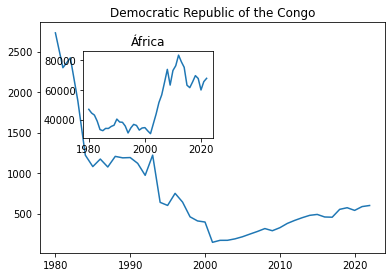

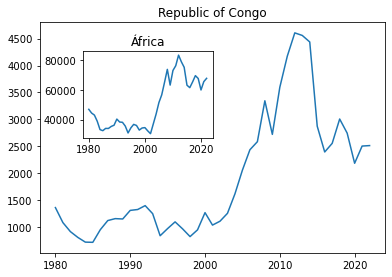

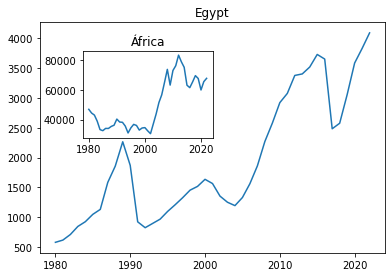

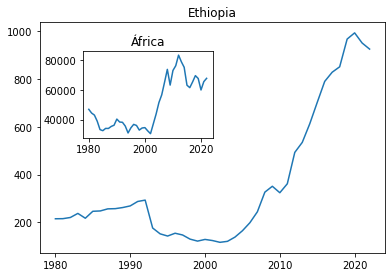

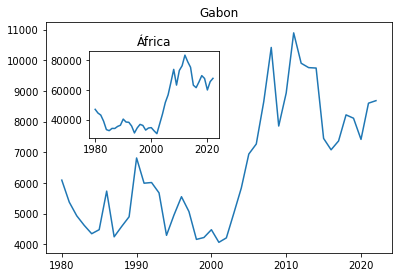

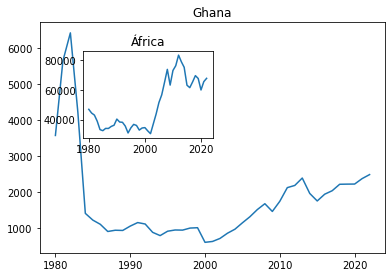

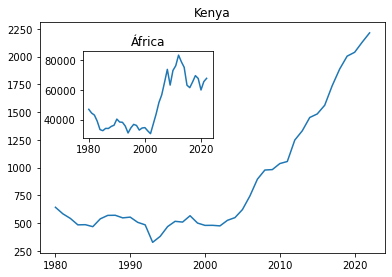

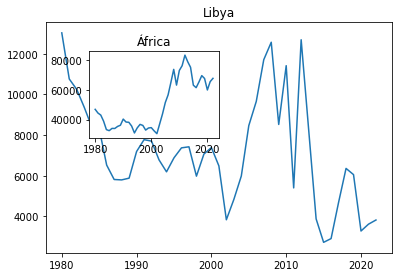

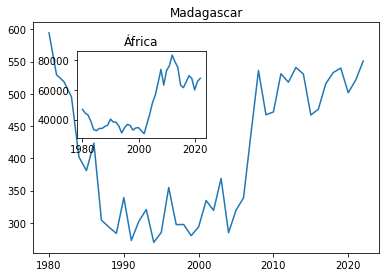

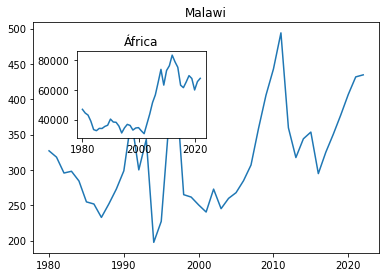

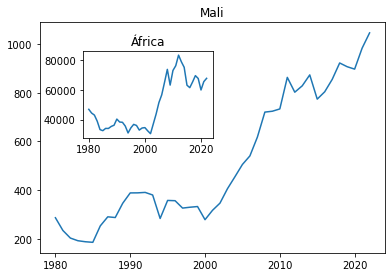

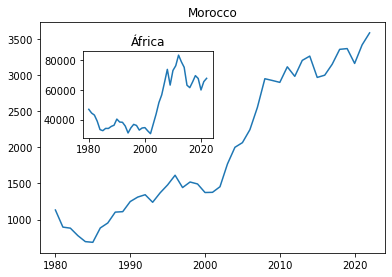

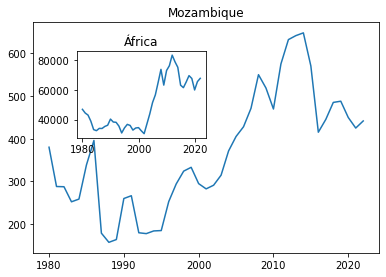

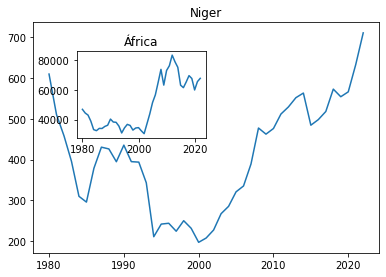

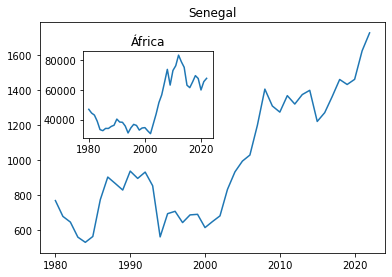

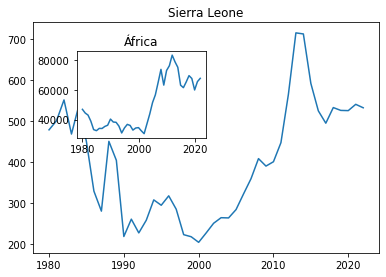

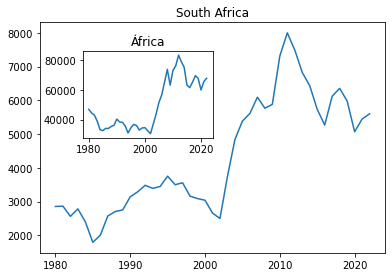

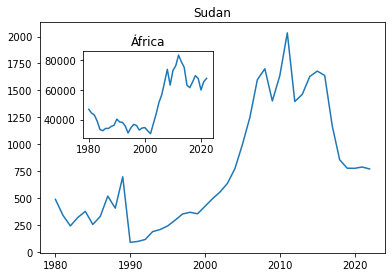

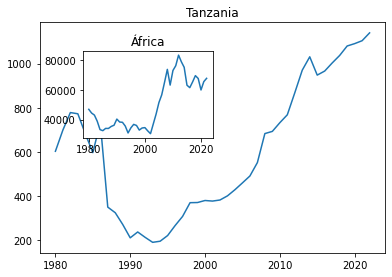

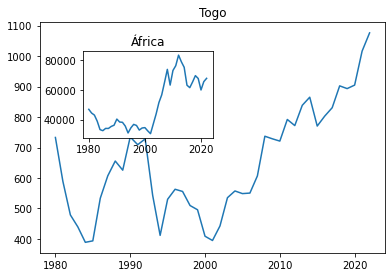

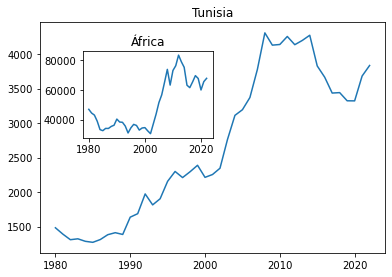

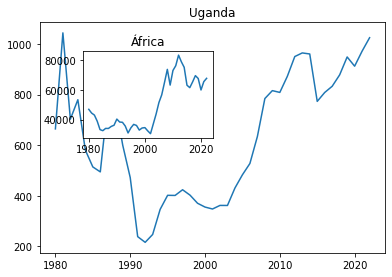

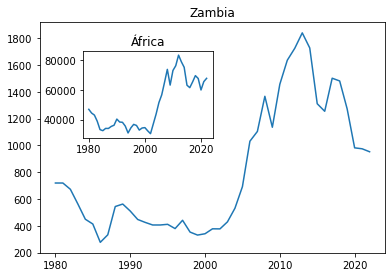

In [79]:


for i in data.columns:
    fig = plt.figure()
    axes1 = fig.add_axes([0.1, 0.1, 0.8,0.8])
    axes2 = fig.add_axes([0.2, 0.5, 0.3,0.3])
    axes1.set_title(i)
    axes2.set_title('África')
    axes2.plot(data.index, data.transpose().sum())
    axes1.plot(data.index, data[i])


# Tratamento
### (Variação PiB da África)

In [70]:
data = pd.read_csv('raw_data/variacao_pib.csv')

In [71]:
data.set_index('Country', inplace=True)

In [72]:
all_countries = data.index

In [73]:
data.shape

(40, 47)

In [74]:
data.head(1)

,Subject Descriptor,Units,Scale,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,"Gross domestic product, constant prices",Percent change,NaN,-5.4,3,6.4,5.4,5.6,5.6,-0.2,...,3.8,3.7,3.2,1.3,1.2,0.8,-5.992,2.864,2.75,2019


In [75]:
data.replace('--', np.nan,inplace=True)
data.drop(data.columns[[0, 1, 2, data.shape[1] -1]], axis=1, inplace = True)
data.dropna(inplace=True)


###### Países com valores faltantes

In [76]:
sed_countries = data.index
retired_countries = {"Retired Countries": list(set(all_countries) - set(used_countries))}
retired_countries = pd.DataFrame(data=retired_countries)
retired_countries.to_csv("data_finish/variacao_pib/Retired_countries_variacao_pib")
retired_countries.to_excel("data_finish/variacao_pib/Retired_countries_variacao_pib.xlsx", sheet_name='Sheet')

In [77]:
data.columns = data.columns.astype(int)

In [78]:
data = data.astype(float).copy()

In [79]:
data.to_csv("data_finish/variacao_pib/Variacao_pib")
data.to_excel("data_finish/variacao_pib/Variacao_pib.xlsx", sheet_name='Sheet')
data = data.transpose()
data.to_csv("data_finish/variacao_pib/Variacao_pib_transpose")
data.to_excel("data_finish/variacao_pib/Variacao_pib_transpose.xlsx", sheet_name='Sheet')

# Tratamento 
### (Paridade Poder De Compra)

In [198]:
data = pd.read_csv('raw_data/paridade_poder_de_compra.csv')

In [131]:
data.set_index('Country', inplace=True)

In [132]:
all_countries = data.index

In [133]:
data.shape

(80, 47)

In [134]:
data.head(1)

,Subject Descriptor,Units,Scale,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,42.346,44.372,44.78,47.529,51.513,61.132,61.535,...,213.81,165.979,160.034,170.207,175.367,171.07,144.294,151.459,150.135,2019


In [135]:
data.drop(data.columns[[0, 1, 2, data.shape[1] -1]], axis=1, inplace = True)


In [136]:
data.head(1)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,42.346,44.372,44.78,47.529,51.513,61.132,61.535,63.3,51.664,52.558,...,209.755,213.81,165.979,160.034,170.207,175.367,171.07,144.294,151.459,150.135


###### Países com valores faltantes

In [137]:
data.dropna(inplace=True)
used_countries = data.index
retired_countries = {"Retired Countries": list(set(all_countries) - set(used_countries))}
retired_countries = pd.DataFrame(data=retired_countries)


{'Eritrea',
 'Liberia',
 'Mauritania',
 'Namibia',
 'Nigeria',
 'Somalia',
 'South Sudan',
 'Zimbabwe'}

In [138]:
data.columns = data.columns.astype(int)
data = data.replace('[^\d.]', '', regex=True).astype(float).copy()

In [139]:
data

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,52.558,...,209.755,213.810,165.979,160.034,170.207,175.367,171.070,144.294,151.459,150.135
Algeria,4813.290,5263.190,5761.060,6109.430,6476.330,6729.560,6671.010,6614.100,6522.140,6930.650,...,13003.310,12940.000,11944.990,11543.300,11644.060,11823.840,11894.860,11112.190,11432.750,11809.720
Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,11.421,...,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440,66.493,68.532
Angola,1223.560,1246.690,1289.600,1360.770,1455.970,1379.590,1407.950,1464.260,1566.380,1585.000,...,7948.020,8507.960,7668.510,7449.180,7681.960,7478.850,7346.300,6931.860,6878.130,6991.530
Benin,2.302,1.557,1.542,1.365,1.456,1.580,2.036,2.430,2.552,2.370,...,12.518,13.288,11.389,11.818,12.697,14.257,14.392,15.193,17.327,19.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunisia,2134.380,2397.780,2473.430,2627.950,2845.770,3003.090,2906.010,3110.910,3168.980,3318.390,...,10174.500,10370.410,10123.890,10269.110,10467.260,10889.630,11074.950,10119.770,10594.080,10996.170
Uganda,7.486,12.120,8.410,9.619,7.399,6.771,6.746,10.878,11.268,9.136,...,32.331,33.122,27.445,29.557,31.384,34.095,37.788,37.613,41.271,44.830
Uganda,526.047,580.338,647.005,683.959,665.808,644.285,640.487,658.189,711.161,758.053,...,2395.130,2440.640,2388.160,2355.780,2382.080,2508.290,2689.090,2574.000,2705.950,2820.690


In [140]:
data.to_csv("data_finish/paridade_poder_de_compra/Paridade_poder_de_compra")
data.to_excel("data_finish/paridade_poder_de_compra/Paridade_poder_de_compra.xlsx", sheet_name='Sheet')

# Tratamento 
### Pib Baseado no Poder de Compra


In [86]:
data = pd.read_csv('raw_data/pib_baseado_poder_de_compra.csv')

In [87]:
data.set_index('Country', inplace=True)

In [88]:
all_countries = data.index

In [89]:
data.shape

(40, 47)

In [90]:
data.head(1)

,Subject Descriptor,Units,Scale,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,Gross domestic product based on purchasing-pow...,Percent,NaN,0.671,0.68,0.722,0.743,0.752,0.767,0.739,...,0.464,0.429,0.408,0.399,0.39,0.383,0.373,0.363,0.357,2019


In [91]:
data.drop(data.columns[[0, 1, 2, data.shape[1] -1]], axis=1, inplace = True)


###### Países com valores faltantes

In [92]:
data.dropna(inplace=True)
used_countries = data.index
retired_countries = {"Retired Countries": list(set(all_countries) - set(used_countries))}
retired_countries = pd.DataFrame(data=retired_countries)
retired_countries.to_csv("data_finish/pib_baseado_poder_de_compra/Retired_countries_pib_baseado_poder_de_compra")
retired_countries.to_excel("data_finish/pib_baseado_poder_de_compra/Retired_countries_pib_baseado_poder_de_compra.xlsx", sheet_name='Sheet')

In [93]:
data.columns = data.columns.astype(int)

In [94]:
data = data.astype(float).copy()

In [95]:
data.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,0.671,0.680,0.722,0.743,0.752,0.767,0.739,0.707,0.664,0.671,...,0.474,0.464,0.429,0.408,0.399,0.390,0.383,0.373,0.363,0.357
Angola,0.081,0.077,0.076,0.078,0.079,0.079,0.078,0.079,0.080,0.077,...,0.190,0.202,0.184,0.177,0.179,0.170,0.164,0.163,0.155,0.152
Benin,0.027,0.027,0.027,0.026,0.025,0.025,0.025,0.024,0.023,0.022,...,0.025,0.027,0.027,0.028,0.028,0.029,0.030,0.032,0.031,0.032


In [97]:
data.to_csv("data_finish/pib_baseado_poder_de_compra/Pib_baseado_poder_de_compra")
data.to_excel("data_finish/pib_baseado_poder_de_compra/Pib_baseado_poder_de_compra.xlsx",
              sheet_name='Sheet')
data = data.transpose()
data.to_csv("data_finish/pib_baseado_poder_de_compra/Pib_baseado_poder_de_compra_transpose")
data.to_excel("data_finish/pib_baseado_poder_de_compra/Pib_baseado_poder_de_compra_transpose.xlsx",
              sheet_name='Sheet')

# Tratamento
### (Pib Nominal)

In [111]:
data = pd.read_csv('raw_data/pib_nominal.csv')

In [112]:
data.set_index('Country', inplace=True)

In [113]:
all_countries = data.index

In [114]:
data.shape

(40, 46)

In [115]:
data.head(1)

,Units,Scale,1980,1981,1982,1983,1984,1985,1986,1987,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,U.S. dollars,Billions,42.346,44.372,44.78,47.529,51.513,61.132,61.535,63.3,...,213.81,165.979,160.034,170.207,175.367,171.07,144.294,151.459,150.135,2019


In [116]:
data.drop(data.columns[[0, 1, data.shape[1] -1]], axis=1, inplace = True)
data.dropna(inplace=True)

###### Países com valores faltantes

In [117]:
used_countries = data.index
retired_countries = {"Retired Countries": list(set(all_countries) - set(used_countries))}
retired_countries = pd.DataFrame(data=retired_countries)
retired_countries.to_csv("data_finish/pib_nominal/Retired_countries_pib_nominal")
retired_countries.to_excel("data_finish/pib_nominal/Retired_countries_pib_nominal.xlsx", sheet_name='Sheet')

In [118]:
data.columns = data.columns.astype(int)

In [119]:
data = data.astype(float).copy()

In [120]:
data.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.30,51.664,52.558,...,209.755,213.810,165.979,160.034,170.207,175.367,171.070,144.294,151.459,150.135
Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.05,9.818,11.421,...,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440,66.493,68.532
Benin,2.302,1.557,1.542,1.365,1.456,1.580,2.036,2.43,2.552,2.370,...,12.518,13.288,11.389,11.818,12.697,14.257,14.392,15.193,17.327,19.056


In [121]:
data.to_csv("data_finish/pib_nominal/Pib_nominal")
data.to_excel("data_finish/pib_nominal/Pib_nominal.xlsx", sheet_name='Sheet')
data = data.transpose()
data.to_csv("data_finish/pib_nominal/Pib_nominal_transpose")
data.to_excel("data_finish/pib_nominal/Pib_nominal_transpose.xlsx", sheet_name='Sheet')

In [110]:
data.head()

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Cameroon,Central African Republic,Chad,Democratic Republic of the Congo,Republic of Congo,...,Niger,Senegal,Sierra Leone,South Africa,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia
1982,44.780,6.214,1.542,1.095,1.934,8.901,0.719,0.844,64.939,1.548,...,2.840,3.850,2.050,78.415,4.748,14.932,1.396,8.900,8.410,4.232
1983,47.529,6.476,1.365,1.210,1.767,8.972,0.690,0.844,52.378,1.407,...,2.538,3.435,1.782,87.417,6.485,15.294,1.330,9.202,9.619,3.653
1984,51.513,6.864,1.456,1.201,1.579,9.482,0.670,0.907,34.951,1.294,...,2.056,3.350,2.062,77.315,7.992,13.915,1.222,9.054,7.399,3.003
1985,61.132,8.457,1.580,1.118,1.746,9.903,0.883,0.983,31.943,1.327,...,2.027,3.668,1.755,59.102,5.547,12.556,1.281,9.245,6.771,2.848
1986,61.535,7.918,2.036,1.516,2.290,12.909,1.158,1.211,35.840,1.815,...,2.680,5.188,1.314,67.562,7.400,15.874,1.795,9.910,6.746,1.962
